In [83]:
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [84]:
opposition_parties = ['c', 'kd', 'l', 'm', 'sd', 'v']
data_path = '../data'
frames = []

for party in opposition_parties:
    frame = pd.read_csv(f'{data_path}/budgetmotion-2022-{party}.csv', dtype=str)
    frame['Parti'] = party.upper()
    frames.append(frame)

In [85]:
df = pd.concat(frames, sort=False)

In [87]:
df = (df
    .pivot_table(index=['Anslag', 'Namn', 'Utgiftsområde'],
                 columns=['Parti'],
                 values='2022')
    .reset_index())

In [88]:
df = df.fillna(0)

In [89]:
gov = pd.read_csv('../data/budgetproposition-2022-regering.csv', dtype=str)

In [90]:
gov['Anslag'] = gov['Underområde'] + ':' + gov['Anslag']

In [91]:
gov = gov.rename(columns={'2022': 'Regeringen'})

In [92]:
gov = gov.dropna(subset=['Anslag'])

In [93]:
df = df.merge(gov[['Anslag', 'Utgiftsområde', 'Regeringen']], on=['Utgiftsområde', 'Anslag'], how='left')

In [94]:
df = df[['Utgiftsområde', 'Anslag', 'Namn', 'Regeringen', 'C', 'KD', 'L', 'M', 'SD', 'V']]

In [95]:
df = df.fillna(0)

In [96]:
df.to_csv('../data/budgetmotion-2022-main.csv', index=False)

In [97]:
for col in ['C', 'KD', 'L', 'M', 'SD', 'V']:
    df[col] = df[col].astype(int) / 1_000_000

In [98]:
for col in ['Regeringen']:
    df[col] = df[col].astype(float) / 1_000_000

In [99]:
for col in ['C', 'KD', 'L', 'M', 'SD', 'V']:
    df[f'{col}_prc'] = df[col] / df['Regeringen']

In [100]:
df.sort_values('SD_prc').head(20)

,Utgiftsområde,Anslag,Namn,Regeringen,C,KD,L,M,SD,V,C_prc,KD_prc,L_prc,M_prc,SD_prc,V_prc
11,17,13:3,Stöd till friluftsorganisationer,97.785,0.0,20.0,0.0,15.0,-1175.100,10.0,0.000000,0.204530,0.000000,0.153398,-12.017181,0.102265
12,17,13:4,Bidrag till riksdagspartiers kvinnoorganisationer,15.000,0.0,0.0,0.0,0.0,-60.000,0.0,0.000000,0.000000,0.000000,0.000000,-4.000000,0.000000
267,18,1:8,Investeringsstöd för anordnande av hyresbostäd...,4050.000,-411.0,0.0,-400.0,0.0,-4050.000,2000.0,-0.101481,0.000000,-0.098765,0.000000,-1.000000,0.493827
113,20,1:18,Stöd för gröna och trygga samhällen,200.000,0.0,-200.0,0.0,0.0,-200.000,-200.0,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000
150,20,1:22,Kompetenslyft för klimatomställningen,100.000,-100.0,-100.0,-100.0,0.0,-100.000,0.0,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000
164,13,1:3,Hemutrustningslån,167.271,0.0,0.0,0.0,0.0,-167.271,0.0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
165,21,1:3,Insatser för förnybar elproduktion,25.000,0.0,-15.0,-25.0,0.0,-25.000,0.0,0.000000,-0.600000,-1.000000,0.000000,-1.000000,0.000000
243,18,1:7,Energieffektivisering av flerbostadshus,1565.000,-1505.0,0.0,-1565.0,-1256.0,-1565.000,1000.0,-0.961661,0.000000,-1.000000,-0.802556,-1.000000,0.638978
51,21,1:10,Lokal och regional kapacitetsutveckling för kl...,140.000,0.0,0.0,0.0,0.0,-140.000,0.0,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
254,15,1:7,Studiestartsstöd,400.000,0.0,-400.0,0.0,0.0,-400.000,0.0,0.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000


In [114]:
p = df[df.Namn == 'Polismyndigheten']

In [115]:
p

,Utgiftsområde,Anslag,Namn,Regeringen,C,KD,L,M,SD,V,C_prc,KD_prc,L_prc,M_prc,SD_prc,V_prc
29,4,1:1,Polismyndigheten,32985.967,321.0,1315.0,400.0,863.0,3145.0,70.0,0.009731,0.039865,0.012126,0.026163,0.095344,0.002122


In [116]:
p

,Utgiftsområde,Anslag,Namn,Regeringen,C,KD,L,M,SD,V,C_prc,KD_prc,L_prc,M_prc,SD_prc,V_prc
29,4,1:1,Polismyndigheten,32985.967,321.0,1315.0,400.0,863.0,3145.0,70.0,0.009731,0.039865,0.012126,0.026163,0.095344,0.002122


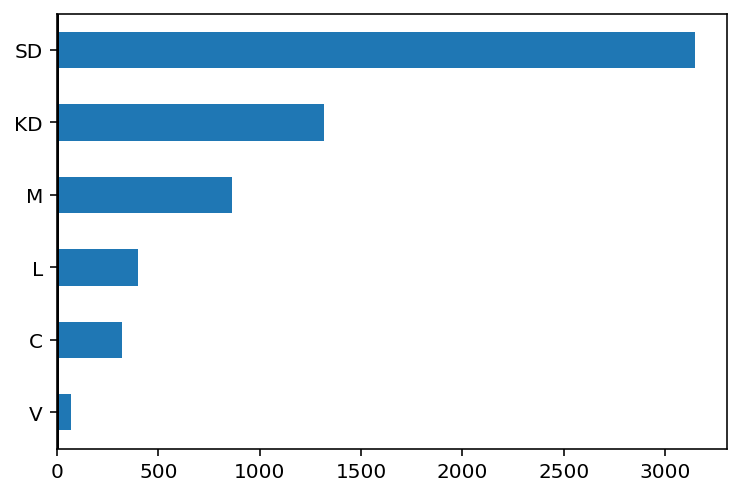

In [118]:
ax = p[['C', 'KD', 'L', 'M', 'SD', 'V']].T.sort_values(29).plot.barh(legend=False)
ax.axvline(1, c='#000000')